In [1]:
## importing the required packages
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
             discriminant_analysis, random_projection)
import seaborn as sns
color = sns.color_palette()

import pandas as pd


# reead cav

In [27]:
feature_df = pd.read_csv( "temp/train_df.csv")

print(feature_df.shape)
feature_df.head()

(390, 10)


,P_mean,collectorEmitterVoltage_std,collectorEmitterVoltage_mean,collectorEmitterVoltage_max,P_std,gateEmitterVoltage_std,P_max,gateEmitterVoltage_mean,temperature,round_num
0,4.281911,1.820022,4.002625,9.999999,9.381336,2.626774,29.223632,1.105346,329.365197,20
1,4.341477,1.894646,4.032715,10.374999,9.548082,2.623343,29.970702,1.099396,328.195866,21
2,4.439115,1.945817,4.042664,10.624999,9.645936,2.623512,30.146483,1.111908,327.515645,22
3,4.685492,2.087839,4.109497,11.374999,10.117124,2.621142,32.958982,1.124801,327.476775,23
4,4.300846,1.891143,4.006226,10.374999,9.506423,2.618877,29.838866,1.094360,327.123709,25


# view correlation

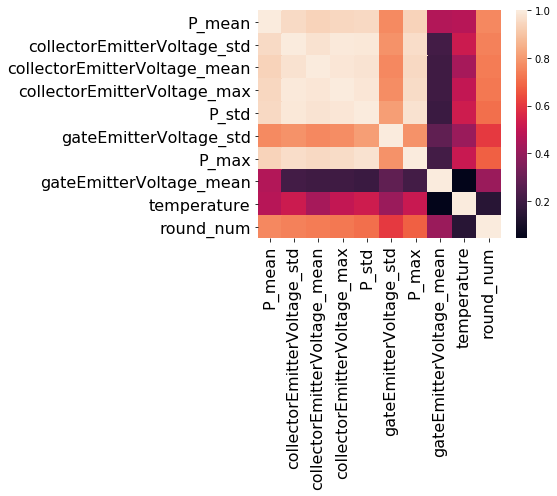

In [28]:
corr_df = abs(feature_df.corr())
corr_df.to_csv("temp/coelationship_train.csv")
plt.figure(figsize=(8,7))
sns.heatmap(corr_df)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('temp/coelationship_train'+'.png')

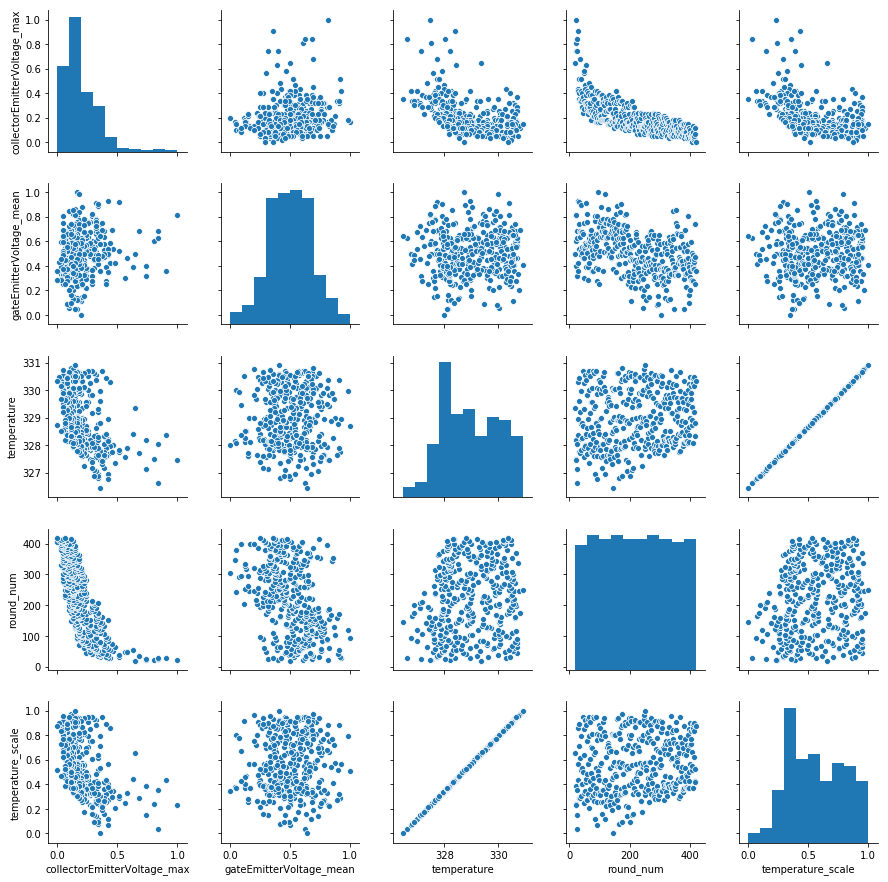

In [41]:

dup_cols = ["P_mean","collectorEmitterVoltage_std","collectorEmitterVoltage_mean","P_std","gateEmitterVoltage_std","P_max"]
df = feature_df.drop(dup_cols,axis = 1, inplace = False)
sns.pairplot(df) 


# delete some outliners
## secondly

In [39]:
# round_num_del = [4,5,6,7]
# round_num_del = [i-4 for i in round_num_del]
# feature_df = pd.read_csv( "temp/train_df.csv")
# feature_df.drop(round_num_del,axis = 0,inplace = True)
# feature_df.head()

,P_mean,collectorEmitterVoltage_std,collectorEmitterVoltage_mean,collectorEmitterVoltage_max,P_std,gateEmitterVoltage_std,P_max,gateEmitterVoltage_mean,temperature,round_num
4,4.323339,1.780973,4.027100,9.687499,9.041481,2.596341,27.470702,1.147690,325.960856,8
5,4.263414,1.746785,3.987671,9.562499,8.986260,2.592829,27.275389,1.135940,330.699725,9
6,4.237322,1.743810,3.976868,9.562499,9.017551,2.601838,27.187499,1.128540,329.744177,10
7,4.359678,1.845634,3.996521,10.124999,9.281649,2.610326,28.603514,1.134033,326.543902,11
8,4.537505,1.995286,4.046387,10.874999,9.700475,2.628870,31.113280,1.139831,323.236735,12


# standardize
## min max scale

In [30]:
# std
from sklearn.preprocessing import MinMaxScaler

feature_df["temperature_scale"] = feature_df["temperature"]
cols_to_use = [ c for c in feature_df.columns if c not in ['round_num',"temperature"]]
fliter = MinMaxScaler()
for col in cols_to_use:
    feature_df[col] = fliter.fit_transform(feature_df[col].values.reshape(-1, 1))
    
feature_df.to_csv( "temp/train_df_scale.csv")
feature_df.head()

,P_mean,collectorEmitterVoltage_std,collectorEmitterVoltage_mean,collectorEmitterVoltage_max,P_std,gateEmitterVoltage_std,P_max,gateEmitterVoltage_mean,temperature,round_num,temperature_scale
0,0.558776,0.609608,0.743518,0.645161,0.613138,0.873887,0.565834,0.49875,329.365197,20,0.653091
1,0.623898,0.718386,0.815732,0.741935,0.700810,0.820791,0.652667,0.40125,328.195866,21,0.390545
2,0.730642,0.792977,0.839607,0.806452,0.752259,0.823396,0.673099,0.60625,327.515645,22,0.237818
3,1.000000,1.000000,1.000000,1.000000,1.000000,0.786713,1.000000,0.81750,327.476775,23,0.229091
4,0.579477,0.713279,0.752161,0.741935,0.678906,0.751657,0.637344,0.31875,327.123709,25,0.149818


In [44]:
# tran to array
# ["P_mean","collectorEmitterVoltage_std","collectorEmitterVoltage_mean","P_std","gateEmitterVoltage_std","P_max"]
dup_cols = ["round_num","temperature", "P_mean","collectorEmitterVoltage_std","collectorEmitterVoltage_mean",
            "P_std","gateEmitterVoltage_std","P_max"]
# dup_cols = ["round_num","temperature", "temperature_scale","collectorEmitterVoltage_mean"]
cols_to_use = [col for col in feature_df.columns if col not in dup_cols]
X = feature_df[cols_to_use].values
print(np.shape(X))

(390, 3)


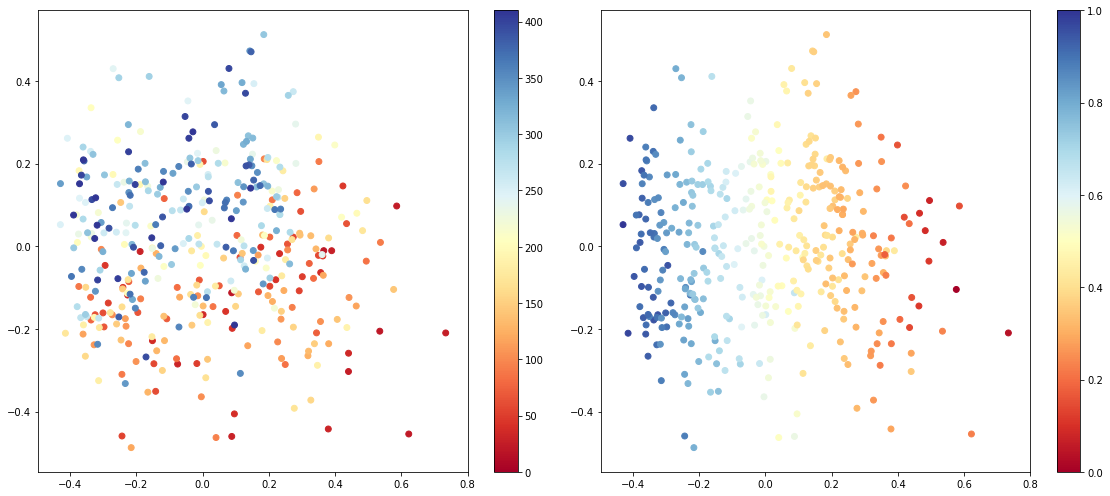

In [45]:
# PCA
# dimension reduce
pca = decomposition.PCA(n_components = 2)
X_reduce = pca.fit_transform(X)

# save map
map_df = pd.DataFrame()
map_df['round_num'] = feature_df['round_num']
map_df['temperature_scale'] = feature_df['temperature_scale']
map_df['x'] = 0
map_df['y'] = 0
map_df[['x','y']] = X_reduce
map_df.to_csv('output/PCA'+'_map.csv',index = False)

# plot it
x = map_df['x'].values
y = map_df['y'].values
color = map_df['round_num'].values
plt.figure(figsize = (16,7))
plt.subplot(121)
sc = plt.scatter(x, y, c=color, vmin=0, vmax=410, s=35, cmap=cm)
plt.colorbar(sc)

plt.subplot(122)
color = map_df['temperature_scale'].values
sc = plt.scatter(x, y, c=color, vmin=0, vmax=1, s=35, cmap=cm)
plt.colorbar(sc)

plt.tight_layout()
plt.savefig("output/PCA"+"_map.png")

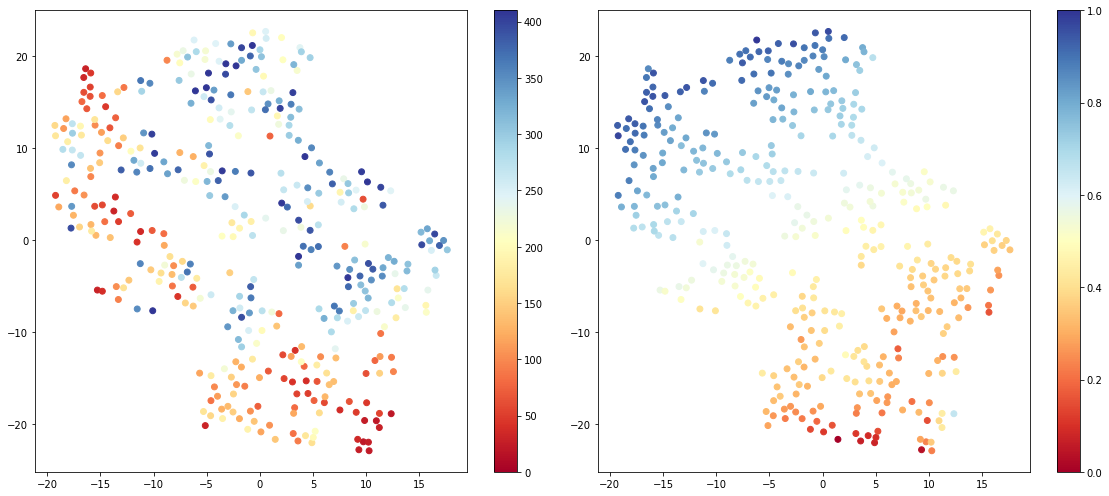

In [46]:
# TSNE
# dimension reduce
tsne = manifold.TSNE(n_components=2, init='random', random_state=1)
X_reduce = tsne.fit_transform(X)

# save map
map_df = pd.DataFrame()
map_df['round_num'] = feature_df['round_num']
map_df['temperature_scale'] = feature_df['temperature_scale']
map_df['x'] = 0
map_df['y'] = 0
map_df[['x','y']] = X_reduce
map_df.to_csv('output/TSNE'+'_map.csv',index = False)

# plot it
x = map_df['x'].values
y = map_df['y'].values
color = map_df['round_num'].values
plt.figure(figsize = (16,7))
plt.subplot(121)
sc = plt.scatter(x, y, c=color, vmin=0, vmax=410, s=35, cmap=cm)
plt.colorbar(sc)

plt.subplot(122)
color = map_df['temperature_scale'].values
sc = plt.scatter(x, y, c=color, vmin=0, vmax=1, s=35, cmap=cm)
plt.colorbar(sc)

plt.tight_layout()
plt.savefig("output/TSNE"+"_map.png")

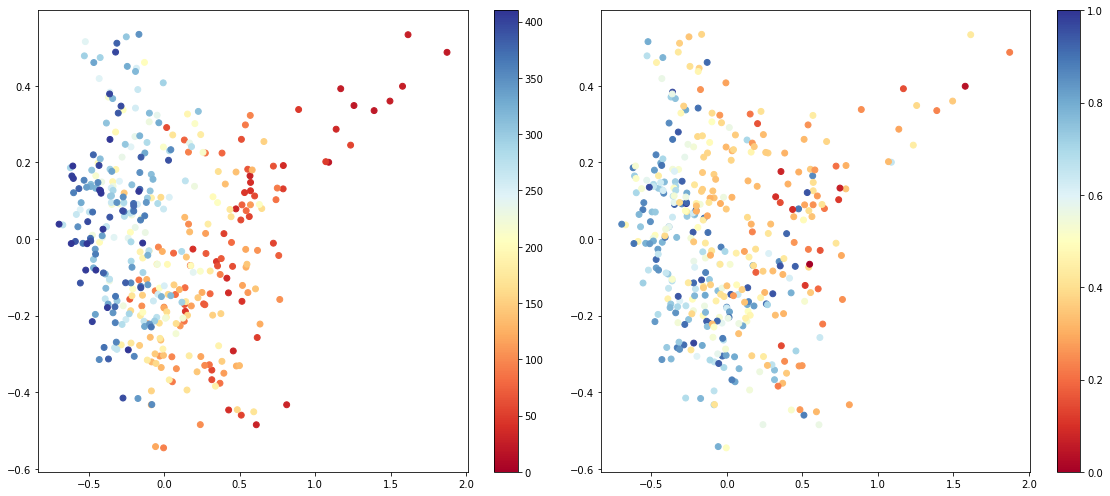

In [34]:
# Isomap
# dimension reduce
Isomap = manifold.Isomap(n_neighbors = 8 , n_components = 2)
X_reduce = Isomap.fit_transform(X)

# save map
map_df = pd.DataFrame()
map_df['round_num'] = feature_df['round_num']
map_df['temperature_scale'] = feature_df['temperature_scale']
map_df['x'] = 0
map_df['y'] = 0
map_df[['x','y']] = X_reduce
map_df.to_csv('output/Isomap'+'_map.csv',index = False)

# plot it
x = map_df['x'].values
y = map_df['y'].values
color = map_df['round_num'].values
plt.figure(figsize = (16,7))
plt.subplot(121)
sc = plt.scatter(x, y, c=color, vmin=0, vmax=410, s=35, cmap=cm)
plt.colorbar(sc)

plt.subplot(122)
color = map_df['temperature_scale'].values
sc = plt.scatter(x, y, c=color, vmin=0, vmax=1, s=35, cmap=cm)
plt.colorbar(sc)

plt.tight_layout()
plt.savefig("output/Isomap"+"_map.png")

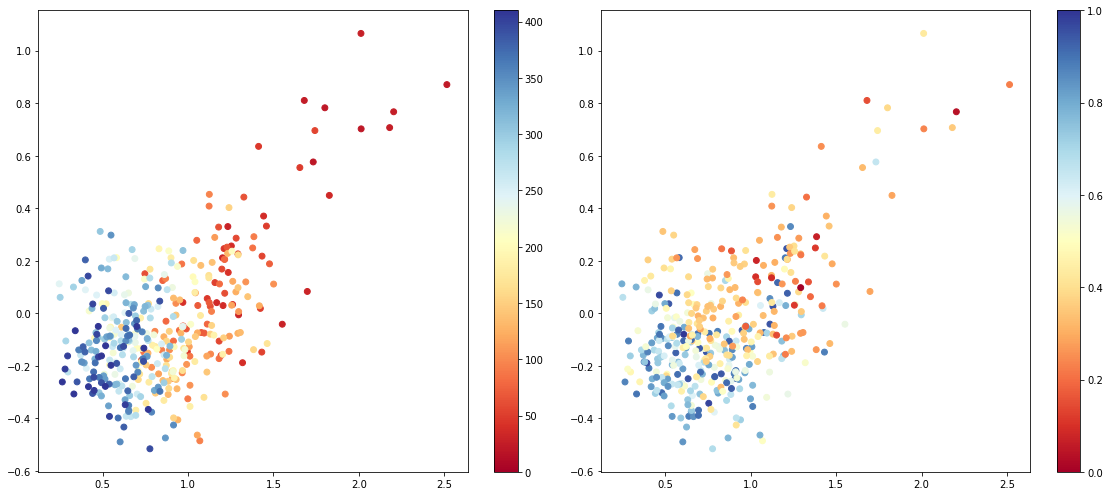

In [23]:

# TruncatedSVD
# dimension reduce
SVD = decomposition.TruncatedSVD(n_components=2)
X_reduce = SVD.fit_transform(X)

# save map
map_df = pd.DataFrame()
map_df['round_num'] = feature_df['round_num']
map_df['temperature_scale'] = feature_df['temperature_scale']
map_df['x'] = 0
map_df['y'] = 0
map_df[['x','y']] = X_reduce
map_df.to_csv('output/SVD'+'_map.csv',index = False)

# plot it
x = map_df['x'].values
y = map_df['y'].values
color = map_df['round_num'].values
plt.figure(figsize = (16,7))
plt.subplot(121)
sc = plt.scatter(x, y, c=color, vmin=0, vmax=410, s=35, cmap=cm)
plt.colorbar(sc)

plt.subplot(122)
color = map_df['temperature_scale'].values
sc = plt.scatter(x, y, c=color, vmin=0, vmax=1, s=35, cmap=cm)
plt.colorbar(sc)

plt.tight_layout()
plt.savefig("output/SVD"+"_map.png")

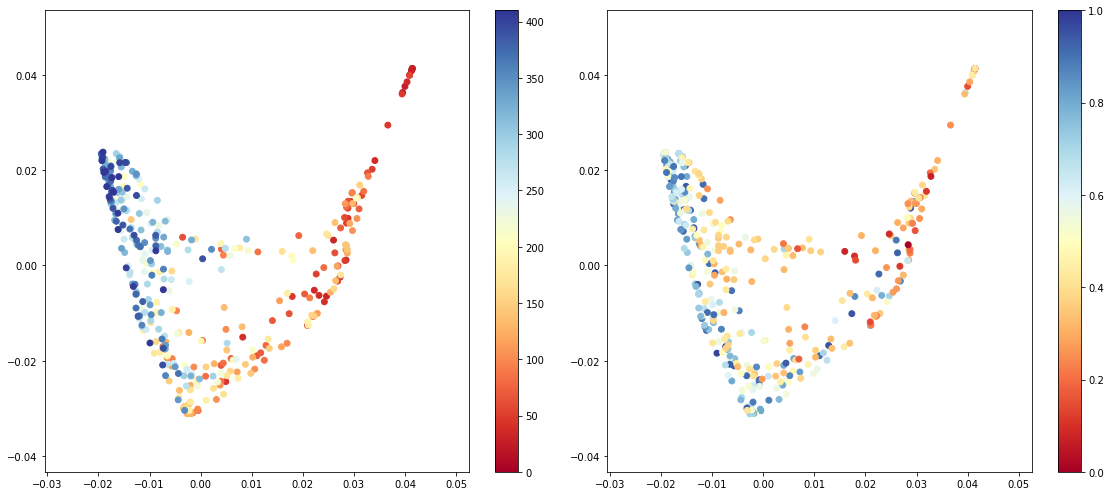

In [35]:
# SpectralEmbedding
# dimension reduce
se = manifold.SpectralEmbedding(n_components= 2, n_neighbors= 10)
X_reduce = se.fit_transform(X)


# save map
map_df = pd.DataFrame()
map_df['round_num'] = feature_df['round_num']
map_df['temperature_scale'] = feature_df['temperature_scale']
map_df['x'] = 0
map_df['y'] = 0
map_df[['x','y']] = X_reduce
map_df.to_csv('output/SpectralEmbedding'+'_map.csv',index = False)

# plot it
x = map_df['x'].values
y = map_df['y'].values
color = map_df['round_num'].values
plt.figure(figsize = (16,7))
plt.subplot(121)
sc = plt.scatter(x, y, c=color, vmin=0, vmax=410, s=35, cmap=cm)
plt.colorbar(sc)

plt.subplot(122)
color = map_df['temperature_scale'].values
sc = plt.scatter(x, y, c=color, vmin=0, vmax=1, s=35, cmap=cm)
plt.colorbar(sc)

plt.tight_layout()
plt.savefig("output/SpectralEmbedding"+"_map.png")

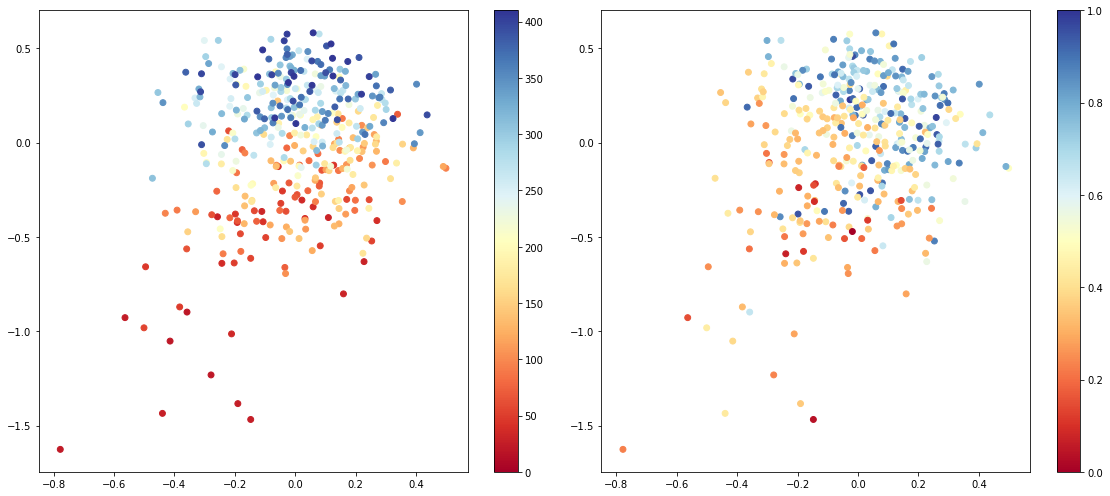

In [36]:
# MDS
# dimension reduce
mds = manifold.MDS(n_components=2)
X_reduce = mds.fit_transform(X)


# save map
map_df = pd.DataFrame()
map_df['round_num'] = feature_df['round_num']
map_df['temperature_scale'] = feature_df['temperature_scale']
map_df['x'] = 0
map_df['y'] = 0
map_df[['x','y']] = X_reduce
map_df.to_csv('output/MDS'+'_map.csv',index = False)

# plot it
x = map_df['x'].values
y = map_df['y'].values
color = map_df['round_num'].values
plt.figure(figsize = (16,7))
plt.subplot(121)
sc = plt.scatter(x, y, c=color, vmin=0, vmax=410, s=35, cmap=cm)
plt.colorbar(sc)

plt.subplot(122)
color = map_df['temperature_scale'].values
sc = plt.scatter(x, y, c=color, vmin=0, vmax=1, s=35, cmap=cm)
plt.colorbar(sc)

plt.tight_layout()
plt.savefig("output/MDS"+"_map.png")

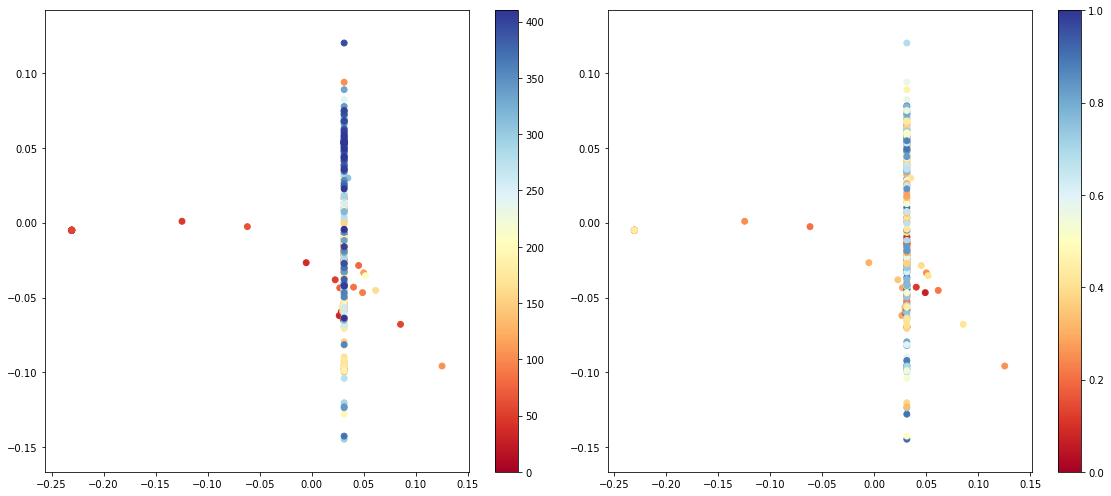

In [38]:
# LocallyLinearEmbedding
# dimension reduce
lle = manifold.LocallyLinearEmbedding(n_components=2,n_neighbors=4,eigen_solver='dense')
X_reduce = lle.fit_transform(X)

# save map
map_df = pd.DataFrame()
map_df['round_num'] = feature_df['round_num']
map_df['temperature_scale'] = feature_df['temperature_scale']
map_df['x'] = 0
map_df['y'] = 0
map_df[['x','y']] = X_reduce
map_df.to_csv('output/LocallyLinearEmbedding'+'_map.csv',index = False)

# plot it
x = map_df['x'].values
y = map_df['y'].values
color = map_df['round_num'].values
plt.figure(figsize = (16,7))
plt.subplot(121)
sc = plt.scatter(x, y, c=color, vmin=0, vmax=410, s=35, cmap=cm)
plt.colorbar(sc)

plt.subplot(122)
color = map_df['temperature_scale'].values
sc = plt.scatter(x, y, c=color, vmin=0, vmax=1, s=35, cmap=cm)
plt.colorbar(sc)

plt.tight_layout()
plt.savefig("output/LocallyLinearEmbedding"+"_map.png")